In [16]:
import numpy as np
import umap
import matplotlib.pyplot as plt

In [3]:
path = 'data/eeg_window_5/'
idx = np.load('%s/idx.npy'%path)
xset = np.load('%s/xset.npy'%path)
yset = np.load('%s/yset.npy'%path)

In [72]:
xset, yset = xset[idx!=24], yset[idx!=24]

In [73]:
x1,x2,x3 = xset[:,0], xset[:,1], xset[:,2]
x1.shape

(33502, 625)

In [74]:
fit = umap.UMAP(n_neighbors=50, min_dist=0.1, n_components=2, metric='euclidean')

In [75]:
x1_fitted = fit.fit_transform(x1)

In [79]:
x2_fitted = fit.fit_transform(x2)

In [80]:
x3_fitted = fit.fit_transform(x3)

In [81]:
x1_fitted.shape, x2_fitted.shape, x3_fitted.shape

((33502, 2), (33502, 2), (33502, 2))

(2021,) (2021,) (31481,) (31481,)


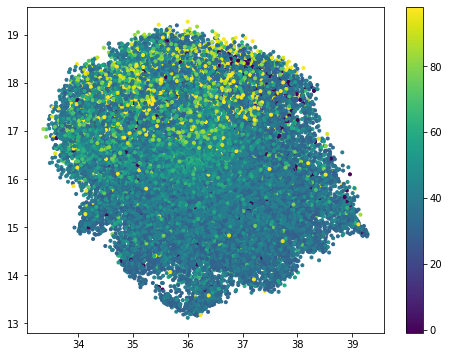

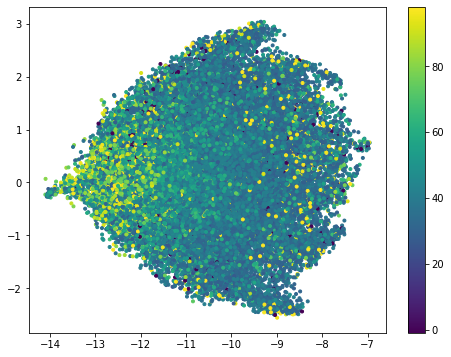

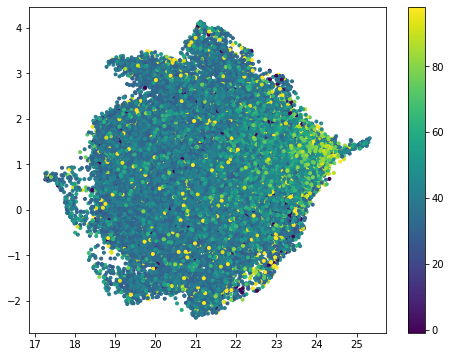

In [82]:
cut=85

x_wake, y_wake = x1_fitted[yset>cut][:,0],  x1_fitted[yset>cut][:,1]
x_sleep, y_sleep = x1_fitted[yset<=cut][:,0], x1_fitted[yset<=cut][:,1]
print(x_wake.shape, y_wake.shape,x_sleep.shape, y_sleep.shape)

plt.figure(figsize=(8,6))
plt.scatter(x1_fitted[:,0], x1_fitted[:,1], marker='.', c=yset)
plt.colorbar()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(x2_fitted[:,0], x2_fitted[:,1], marker='.', c=yset)
plt.colorbar()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(x3_fitted[:,0], x3_fitted[:,1], marker='.', c=yset)
plt.colorbar()
plt.show()

#plt.figure(figsize=(10,2))
#plt.scatter(x1_fitted[:,0], x1_fitted[:,1], marker='.', c=idx[idx!=24])
#plt.colorbar()
#plt.show()
#plt.subplot(1,2,1)
#plt.scatter(x_wake,y_wake, marker='.', c='r')
#plt.subplot(1,2,2)
#plt.scatter(x_sleep,y_sleep, marker='.')
plt.show()

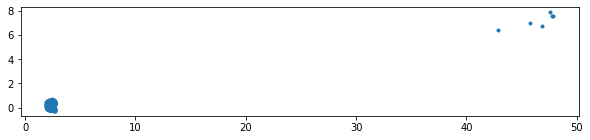

In [71]:
nid=24
plt.figure(figsize=(10,2))
plt.scatter(x1_fitted[:,0][idx==nid],x1_fitted[:,1][idx==nid], marker='.')
plt.show()

##### 